#ML4GEN
The LinkedIn Job Listings dataset contains features like Job Title,
Company, Location, Skills, Job Type, Industry, and other metadata (e.g., posting date, company size).
These features enable various machine learning tasks such as classification (e.g., predicting job type),
regression (e.g., salary prediction), and recommendation (e.g., job matching based on user profiles and
skills). The goal is to identify key job market trends and recommend opportunities using predictive
modeling.

## Part 1: Data Preparation and Cleaning

### Load and Explore the Data:

Loading all the necessary libraries and datasets into Google Colab.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import re

# Loading datasets
df_comp = pd.read_csv('drive/MyDrive/Colab Notebooks/CS483-BigDataMining/LinkedinJobs/companies/companies.csv')
df_benf = pd.read_csv('drive/MyDrive/Colab Notebooks/CS483-BigDataMining/LinkedinJobs/jobs/benefits.csv')
df_jobIn = pd.read_csv('drive/MyDrive/Colab Notebooks/CS483-BigDataMining/LinkedinJobs/jobs/job_industries.csv')
df_jobSkl = pd.read_csv('drive/MyDrive/Colab Notebooks/CS483-BigDataMining/LinkedinJobs/jobs/job_skills.csv')
df_ind = pd.read_csv('drive/MyDrive/Colab Notebooks/CS483-BigDataMining/LinkedinJobs/mappings/industries.csv')
df_skills = pd.read_csv('drive/MyDrive/Colab Notebooks/CS483-BigDataMining/LinkedinJobs/mappings/skills.csv')
df_postings = pd.read_csv('drive/MyDrive/Colab Notebooks/CS483-BigDataMining/LinkedinJobs/postings.csv')

In [ ]:
# Merging job benifits, industry and job skills data
df_postings = df_postings.merge(df_benf, on='job_id', how='left')
df_postings = df_postings.merge(df_jobIn, on='job_id', how='left')
df_postings = df_postings.merge(df_jobSkl, on='job_id', how='left')

### Data Cleaning:

Handling missing values and clean the data based on your analysis needs.

In [ ]:
# Identify missing data in the merged dataset
missing_data = df_postings.isnull().sum()

# Display columns with significant missing data
significant_missing_columns = missing_data[missing_data > 0].sort_values(ascending=False)
significant_missing_columns

,0
closed_time,383662
skills_desc,380682
med_salary,368646
remote_allowed,329881
applies,294869
max_salary,271640
min_salary,271640
compensation_type,254499
pay_period,254499
normalized_salary,254499


In [ ]:
# Use "Not Specified" for categorical columns with missing values
cols_fill_not_specified = ['skills_desc','type', 'currency', 'compensation_type', 'posting_domain',
                           'application_url', 'zip_code','company_name', 'title', 'description']
for col in cols_fill_not_specified:
    df_postings[col] = df_postings[col].astype('object')
    df_postings[col].fillna("Not Specified", inplace=True)

# Fill numerical columns with zeros
cols_fill_zero = ['applies', 'views']
for col in cols_fill_zero:
    df_postings[col].fillna(0, inplace=True)

df_postings = df_postings.drop('fips', axis=1)

# Dropping Missing Values
df_postings = df_postings.dropna(subset=['formatted_experience_level']).reset_index(drop=True)

# Fill remote_allowed with "Unknown"
df_postings['remote_allowed'] = df_postings['remote_allowed'].astype('object')
df_postings['remote_allowed'].fillna("Unknown", inplace=True)

# Check remaining missing values
remaining_missing = df_postings.isnull().sum()
remaining_missing_cols = remaining_missing[remaining_missing > 0].sort_values(ascending=False)
remaining_missing_cols

<ipython-input-5-b96144f9ac33>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_postings[col].fillna("Not Specified", inplace=True)
<ipython-input-5-b96144f9ac33>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

,0
closed_time,298395
med_salary,285784
max_salary,209318
min_salary,209318
pay_period,195758
normalized_salary,195758
inferred,164733
company_id,1178


In [ ]:
# Handle remaining missing values

# Use "Still Open" for closed_time
df_postings['closed_time'] = df_postings['closed_time'].astype('object')
df_postings['closed_time'].fillna("Still Open", inplace=True)

# Use "Unknown" for inferred
df_postings['inferred'] = df_postings['inferred'].astype('object')
df_postings['inferred'].fillna("Unknown", inplace=True)

# Use "Not Specified" for company description
df_postings['description'].fillna("Not Specified", inplace=True)

# Check for remaining missing values
remaining_missing = df_postings.isnull().sum()
remaining_missing_cols = remaining_missing[remaining_missing > 0].sort_values(ascending=False)
remaining_missing_cols

<ipython-input-6-62385a0bb32c>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_postings['closed_time'].fillna("Still Open", inplace=True)
<ipython-input-6-62385a0bb32c>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

,0
med_salary,285784
max_salary,209318
min_salary,209318
pay_period,195758
normalized_salary,195758
company_id,1178


In [ ]:
# Handling missing values in each dataset
# For the 'df_comp' dataset, fill missing values in 'name' and 'city' with placeholders, or drop if they are non-essential
df_comp['name'].fillna('Unknown', inplace=True)
df_comp['city'].fillna('Unknown', inplace=True)
df_comp['company_size'].fillna(df_comp['company_size'].mean(), inplace=True)


df_postings = df_postings.drop_duplicates()
df_postings.reset_index(drop=True, inplace=True)


<ipython-input-7-86fe3301e8b9>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_comp['name'].fillna('Unknown', inplace=True)
<ipython-input-7-86fe3301e8b9>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [ ]:
df_postings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299344 entries, 0 to 299343
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   job_id                      299344 non-null  int64  
 1   company_name                299344 non-null  object 
 2   title                       299344 non-null  object 
 3   description                 299344 non-null  object 
 4   max_salary                  90026 non-null   float64
 5   pay_period                  103586 non-null  object 
 6   location                    299344 non-null  object 
 7   company_id                  298166 non-null  float64
 8   views                       299344 non-null  float64
 9   med_salary                  13560 non-null   float64
 10  min_salary                  90026 non-null   float64
 11  formatted_work_type         299344 non-null  object 
 12  applies                     299344 non-null  float64
 13  original_liste

In [ ]:
df_postings.head(3)

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,inferred,type,industry_id,skill_abr
0,2147609789,Revature,Entry Level Oracle Financial Technology Consul...,About RevatureRevature is one of the largest a...,NaN,NaN,"East Chicago, IN",10510386.0,2.0,NaN,...,0,FULL_TIME,Not Specified,Not Specified,NaN,46312.0,Unknown,Not Specified,43.0,FIN
1,2457183642,Galerie Candy and Gifts,Quality Assurance Manager,Galerie is seeking an experienced Quality Assu...,NaN,NaN,"Hebron, KY",46713.0,2.0,NaN,...,0,FULL_TIME,Not Specified,Not Specified,NaN,41048.0,Unknown,Not Specified,25.0,QA
2,2457183642,Galerie Candy and Gifts,Quality Assurance Manager,Galerie is seeking an experienced Quality Assu...,NaN,NaN,"Hebron, KY",46713.0,2.0,NaN,...,0,FULL_TIME,Not Specified,Not Specified,NaN,41048.0,Unknown,Not Specified,25.0,PRJM


## Part 2: Job Analysis

### Visualize Data Distributions

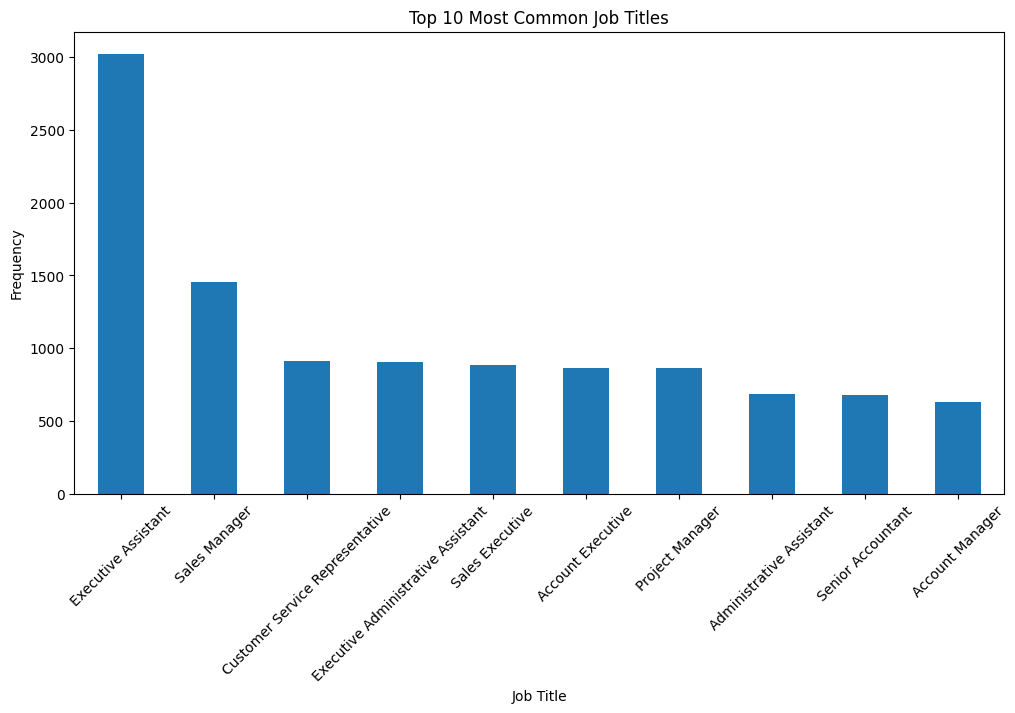

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the most common job titles
plt.figure(figsize=(12, 6))
df_postings['title'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Most Common Job Titles")
plt.xlabel("Job Title")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


### Location Frequency

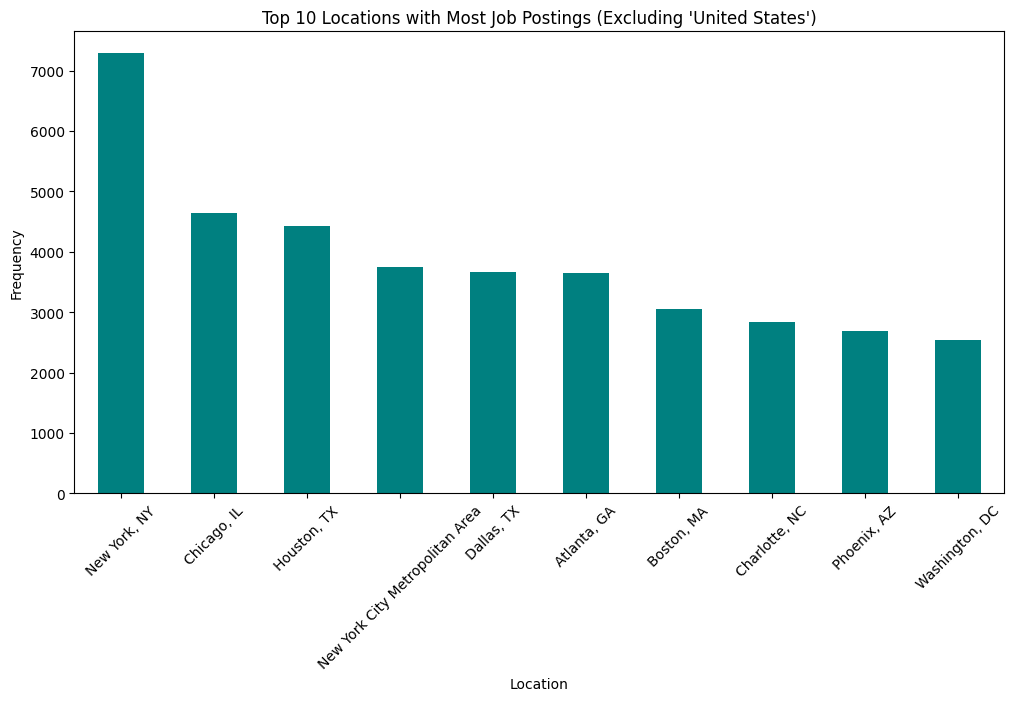

In [ ]:
# Exclude "United States" from the location data before plotting
top_locations = df_postings['location'].value_counts().drop("United States", errors='ignore').head(10)

# Plot the top locations excluding "United States"
plt.figure(figsize=(12, 6))
top_locations.plot(kind='bar', color='teal')
plt.title("Top 10 Locations with Most Job Postings (Excluding 'United States')")
plt.xlabel("Location")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


### Work Type Distribution

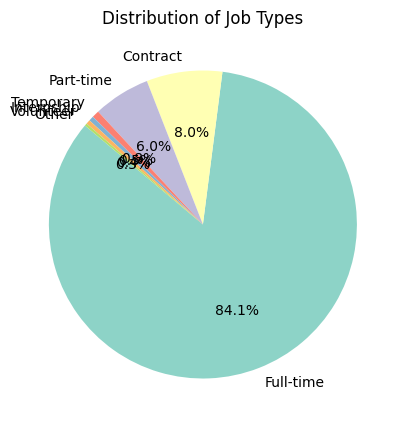

In [ ]:
# Plot the distribution of job types
plt.figure(figsize=(8, 5))
df_postings['formatted_work_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.title("Distribution of Job Types")
plt.ylabel("")  # Hide y-axis label
plt.show()


### Experience Level

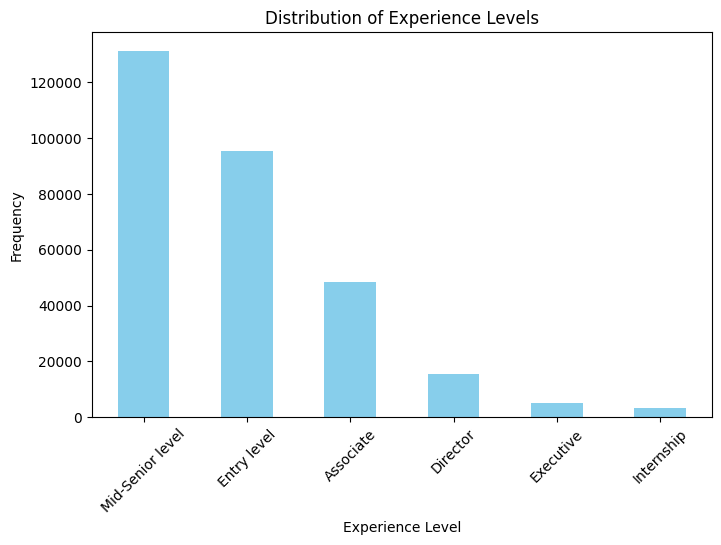

In [ ]:
# Plot the distribution of experience levels
plt.figure(figsize=(8, 5))
df_postings['formatted_experience_level'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution of Experience Levels")
plt.xlabel("Experience Level")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


### Correlation Analysis

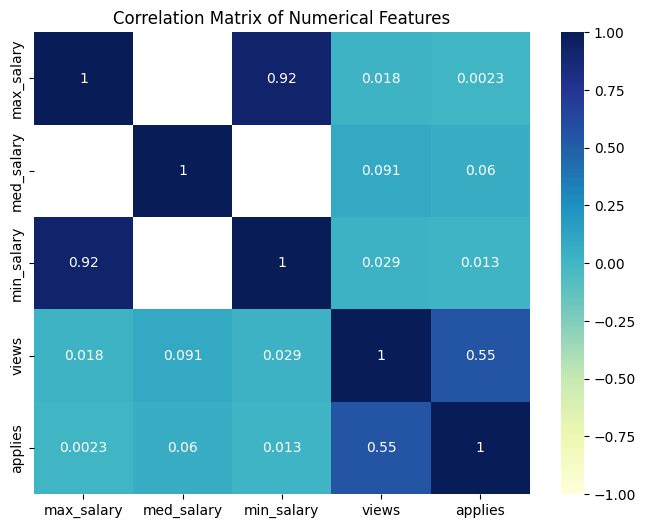

In [ ]:
# Compute correlation matrix
correlation_matrix = df_postings[['max_salary', 'med_salary', 'min_salary', 'views', 'applies']].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


## Part 3: Job Experience Prediction

1. **Feature Selection**:
   - Select relevant features for predicting job categories, such as `title`, `location`, `formatted_work_type`, and `skills`.
   
2. **Model Training**:
   - Implement decision trees for interpretability, random forests to reduce overfitting, and SVM for capturing non-linear relationships.
   
3. **Model Evaluation**:
   - Use metrics like accuracy, precision, recall, and F1-score to assess model performance.
   - Fine-tune hyperparameters to optimize each algorithm.

### Data & Import Statements

In [ ]:
df_postings[['title', 'description', 'location', 'formatted_experience_level', 'skills_desc', 'skill_abr']].head(3)

,title,description,location,formatted_experience_level,skills_desc,skill_abr
0,Entry Level Oracle Financial Technology Consul...,About RevatureRevature is one of the largest a...,"East Chicago, IN",Entry level,Not Specified,FIN
1,Quality Assurance Manager,Galerie is seeking an experienced Quality Assu...,"Hebron, KY",Mid-Senior level,Not Specified,QA
2,Quality Assurance Manager,Galerie is seeking an experienced Quality Assu...,"Hebron, KY",Mid-Senior level,Not Specified,PRJM


In [ ]:
import pandas as pd
import numpy as np
import time
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_fscore_support
)

!pip install optuna
import optuna

### Data Preparation

In [ ]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Subsetting For Job Description and Experience Level
want =  ["description","formatted_experience_level"]
df = df_postings[want]

In [ ]:
df['description'] = df['description'].astype(str)
df["formatted_experience_level"] = np.where(df["formatted_experience_level"] == 'Entry level',1,0)

<ipython-input-24-38ac75db8d92>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['description'] = df['description'].astype(str)
<ipython-input-24-38ac75db8d92>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["formatted_experience_level"] = np.where(df["formatted_experience_level"] == 'Entry level',1,0)


In [ ]:
def Features(df, column_name):
    feature_columns = ['word_cnt', 'sent_cnt', 'vocab_cnt', 'Avg_sent_word_cnt', 'lexical_richness','Readability_index']
    feature_data = []

    for index, row in df.iterrows():
        text = row[column_name]

        # Simple features (Word Count, Sentance Count, Vocabulary Count, Lexical Diversity)
        tokens = nltk.word_tokenize(text)
        char_cnt = len(tokens)

        words = [w for w in tokens if w.isalpha()]
        word_cnt = len(words)

        avg_word_length = char_cnt/word_cnt

        sents = nltk.sent_tokenize(text)
        sent_cnt = len(sents)

        avg_sent_length = word_cnt / sent_cnt if sent_cnt > 0 else 0
        avg_sent_length = round(avg_sent_length,2)

        vocab = set(words)
        vocab_cnt = len(vocab)

        lex_richness = round(vocab_cnt / word_cnt, 4)

        ARI = 4.71*avg_word_length + .5*avg_sent_length - 21.43

        # Append the column data
        feature_data.append([word_cnt, sent_cnt, vocab_cnt, avg_sent_length, lex_richness ,ARI]) # dropped avg_sent_length

    feature_df = pd.DataFrame(feature_data, columns=feature_columns)

    # Combine the original DataFrame with the new DataFrame containing features
    result_df = pd.concat([df, feature_df], axis=1)

    return result_df

In [ ]:
FE_df = Features(df,'description')

In [ ]:
FE_df['Cust_Service'] = FE_df['description'].apply(lambda x: 1 if 'customer service' in x.lower() else 0)
FE_df['diploma_ged'] = FE_df['description'].apply(lambda x: 1 if 'diploma ged' in x.lower() else 0)
FE_df['per_hour'] = FE_df['description'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)
FE_df['diploma_equiv'] = FE_df['description'].apply(lambda x: 1 if 'diploma equivalent' in x.lower() else 0)
FE_df['project_management'] = FE_df['description'].apply(lambda x: 1 if 'project management' in x.lower() else 0)
FE_df['cross_functional'] = FE_df['description'].apply(lambda x: 1 if 'cross functional' in x.lower() else 0)
FE_df['minimum_years'] = FE_df['description'].apply(lambda x: 1 if 'minimum years' in x.lower() else 0)
FE_df['experience_working'] = FE_df['description'].apply(lambda x: 1 if 'experience working' in x.lower() else 0)
FE_df['management'] = FE_df['description'].apply(lambda x: 1 if 'management ' in x.lower() else 0)
FE_df['track_record'] = FE_df['description'].apply(lambda x: 1 if 'track_record ' in x.lower() else 0)

In [ ]:
x_fe = FE_df.drop(['description', 'formatted_experience_level'], axis=1)
y_fe = FE_df['formatted_experience_level']

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_fe, y_fe, test_size = 0.2, random_state = 1)

In [ ]:
X_train2.head()

,word_cnt,sent_cnt,vocab_cnt,Avg_sent_word_cnt,lexical_richness,Readability_index,Cust_Service,diploma_ged,per_hour,diploma_equiv,project_management,cross_functional,minimum_years,experience_working,management,track_record
66241,816,28,453,29.14,0.5551,-1.261103,0,0,0,0,0,1,0,0,1,0
132096,727,33,361,22.03,0.4966,-4.979388,0,0,0,0,0,0,0,0,1,0
282237,490,28,289,17.50,0.5898,-6.912653,0,0,1,0,0,0,0,0,0,0
22944,586,16,332,36.62,0.5666,2.417867,0,0,0,0,0,1,0,0,1,0
3357,133,5,99,26.60,0.7444,-1.826391,0,0,0,0,0,0,0,0,0,0


In [ ]:
!pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train2, y_train2)

In [ ]:
scaler = MinMaxScaler()
X_train_resampled_normalized = scaler.fit_transform(X_train_resampled)
X_test2_normalized = scaler.transform(X_test2)

X_train_resampled_normalized = pd.DataFrame(X_train_resampled_normalized, columns=X_train2.columns)
X_test2_normalized = pd.DataFrame(X_test2_normalized, columns=X_test2.columns)

In [ ]:
df_postings.columns

Index(['job_id', 'company_name', 'title', 'description', 'max_salary',
       'pay_period', 'location', 'company_id', 'views', 'med_salary',
       'min_salary', 'formatted_work_type', 'applies', 'original_listed_time',
       'remote_allowed', 'job_posting_url', 'application_url',
       'application_type', 'expiry', 'closed_time',
       'formatted_experience_level', 'skills_desc', 'listed_time',
       'posting_domain', 'sponsored', 'work_type', 'currency',
       'compensation_type', 'normalized_salary', 'zip_code', 'inferred',
       'type', 'industry_id', 'skill_abr'],
      dtype='object')

### Explainability via SHAP

SHapley Additive exPlanations (SHAP) - helps us interpret the contribution of each attribute on the prediction in a detailed manner. We'll go in the depth of it in the cells below. To begin, we first import shap.

In [ ]:
!pip install shap
import shap

def getShapValues(x, model, model_type):
    if model_type == 'tree':
        explainer = shap.TreeExplainer(model)
    elif model_type == 'linear':
        explainer = shap.LinearExplainer(model, x)
    elif model_type == 'deep':
        explainer = shap.DeepExplainer(model, x)
    elif model_type == 'kernel':
        explainer = shap.KernelExplainer(model.predict, x)
    elif model_type == 'permutation':
        explainer = shap.PermutationExplainer(model.predict, x)
    else:
        raise ValueError("Unsupported model type!")

    shap_values = explainer.shap_values(x)
    print(shap_values)
    shap.summary_plot(shap_values, x)

### Logistic Regression

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer

In [ ]:
# Preprocessing: Normalize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled_normalized)
X_test_scaled = scaler.transform(X_test2_normalized)

In [ ]:
# Train Logistic Regression
C_value = 1.0  # Default value for LogisticRegression
penalty = 'l2'  # Default penalty
solver = 'lbfgs'  # Suitable solver for 'l2'

logistic_fe = LogisticRegression(
    C=C_value,
    penalty=penalty,
    solver=solver,
    max_iter=1000
)
logistic_fe.fit(X_train_scaled, y_train_resampled)

LogisticRegression(max_iter=1000)

In [ ]:
# Predict on Train and Test
y_train_pred = logistic_fe.predict(X_train_scaled)
y_test_pred = logistic_fe.predict(X_test_scaled)

# Metrics: Train and Test
train_acc = accuracy_score(y_train_resampled, y_train_pred)
test_acc = accuracy_score(y_test2, y_test_pred)
print(f"Train Accuracy: {train_acc:.2%}")
print(f"Test Accuracy: {test_acc:.2%}")

Train Accuracy: 65.83%
Test Accuracy: 65.28%


In [ ]:
# Additional Metrics
y_test_prob = logistic_fe.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test2, y_test_prob)
auc_score = roc_auc_score(y_test2, y_test_prob)
precision, recall, f1, _ = precision_recall_fscore_support(y_test2, y_test_pred)

print(f"AUC Score: {auc_score:.2%}")
print(f"Precision: {precision[1]:.2%}")
print(f"Recall: {recall[1]:.2%}")
print(f"F1-Score: {f1[1]:.2%}")

AUC Score: 71.87%
Precision: 46.91%
Recall: 67.46%
F1-Score: 55.34%


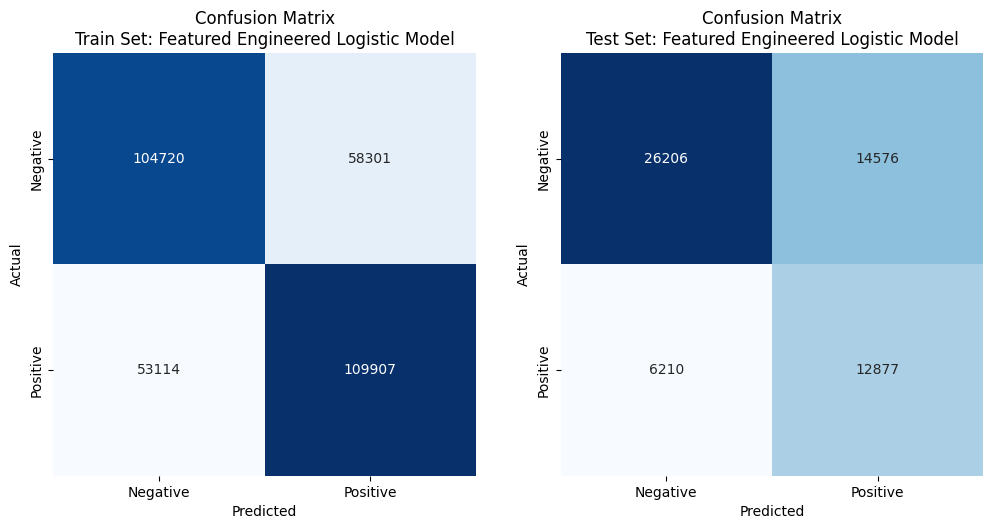

In [ ]:
conf_matrix_train_lfe = confusion_matrix(y_train_resampled, y_train_pred)
conf_matrix_test_lfe = confusion_matrix(y_test2, y_test_pred)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# First heatmap for Train Set
sns.heatmap(conf_matrix_train_lfe, annot=True, fmt='d', cmap='Blues', square=True,cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=[ 'Negative','Positive'], ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Confusion Matrix\nTrain Set: Featured Engineered Logistic Model')

# Second heatmap for Test Set
sns.heatmap(conf_matrix_test_lfe, annot=True, fmt='d', cmap='Blues', square=True,cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=[ 'Negative','Positive'], ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title('Confusion Matrix\nTest Set: Featured Engineered Logistic Model');

[[-1.96800402  0.34659624  1.91162134 ...  0.02441941 -0.33982249
   0.        ]
 [-1.45375752  0.51750169  0.94104097 ...  0.02441941 -0.33982249
   0.        ]
 [-0.08435954  0.34659624  0.18145633 ...  0.02441941  0.22654833
   0.        ]
 ...
 [-0.18836445 -0.02939574  0.445201   ...  0.02441941 -0.33982249
   0.        ]
 [ 1.44682386 -0.30284445 -1.27441423 ...  0.02441941 -0.33982249
   0.        ]
 [ 0.82857245 -0.20030118 -0.51482959 ...  0.02441941 -0.33982249
   0.        ]]


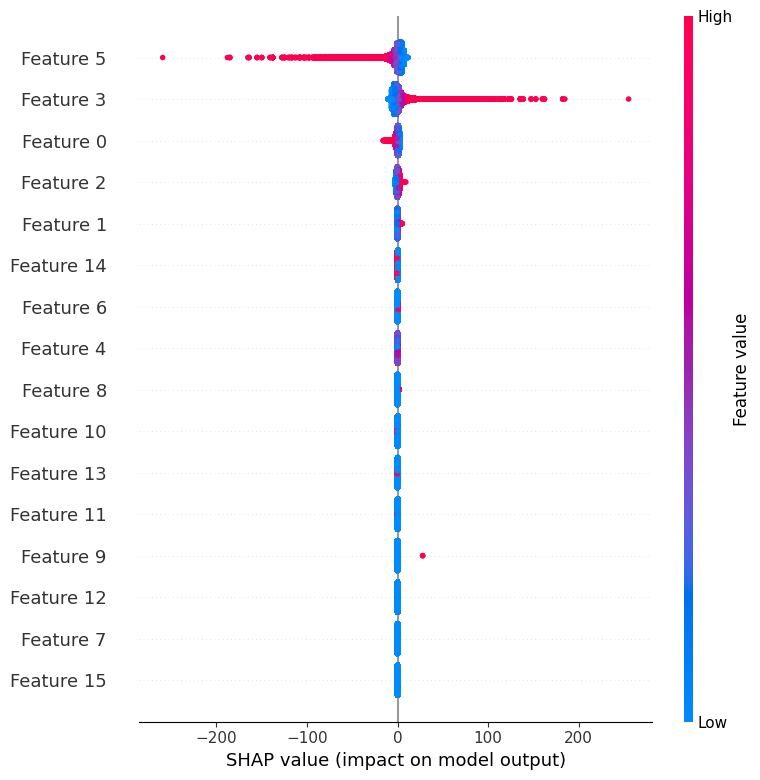

In [ ]:
# shap values and plot
getShapValues(X_train_scaled, logistic_fe, "linear")

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score
import time

start_time = time.time()
bayes_fe = GaussianNB()
bayes_fe_10fold = cross_val_score(bayes_fe, X_train_resampled_normalized, y_train_resampled, cv=10)
end_time = time.time()
bayes_fe_tt = end_time - start_time
print(f"Training Duration: {bayes_fe_tt} Seconds")

mean_acc_bfe = bayes_fe_10fold.mean()
print(f"10-Fold Cross-Validation Accuracy: {mean_acc_bfe:.2%}")

bayes_fe.fit(X_train_resampled_normalized, y_train_resampled)
y_train_pred_bfe = bayes_fe.predict(X_train_resampled_normalized)
train_acc_bfe = accuracy_score(y_train_resampled, y_train_pred_bfe)
print(f"Train Accuracy: {train_acc_bfe:.2%}")

y_test_pred_bfe = bayes_fe.predict(X_test2_normalized)
test_acc_bfe = accuracy_score(y_test2, y_test_pred_bfe)
print(f"Test Accuracy: {test_acc_bfe:.2%}")


Training Duration: 1.8722753524780273 Seconds
10-Fold Cross-Validation Accuracy: 52.43%
Train Accuracy: 52.43%
Test Accuracy: 68.99%


In [ ]:
# Compute test probabilities, false positive rate, true positive rate, and auc
y_test_prob_bfe = bayes_fe.predict_proba(X_test2_normalized)[:, 1]  # Probability of class 1 (positive)
fpr_bfe, tpr_bfe, threshold_bfe = roc_curve(y_test2,y_test_prob_bfe)
auc_score_bfe = roc_auc_score(y_test2, y_test_prob_bfe)
precision_bfe, recall_bfe, f1_bfe, _ = precision_recall_fscore_support(y_test2, y_test_pred_bfe)
print(f"AUC Score: {auc_score_bfe:.2%}")
print(f"Precision: {precision_bfe[1]:.2%}")
print(f"Recall: {recall_bfe[1]:.2%}")
print(f"F1-Score: {f1_bfe[1]:.2%}")

AUC Score: 68.00%
Precision: 62.65%
Recall: 6.76%
F1-Score: 12.20%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


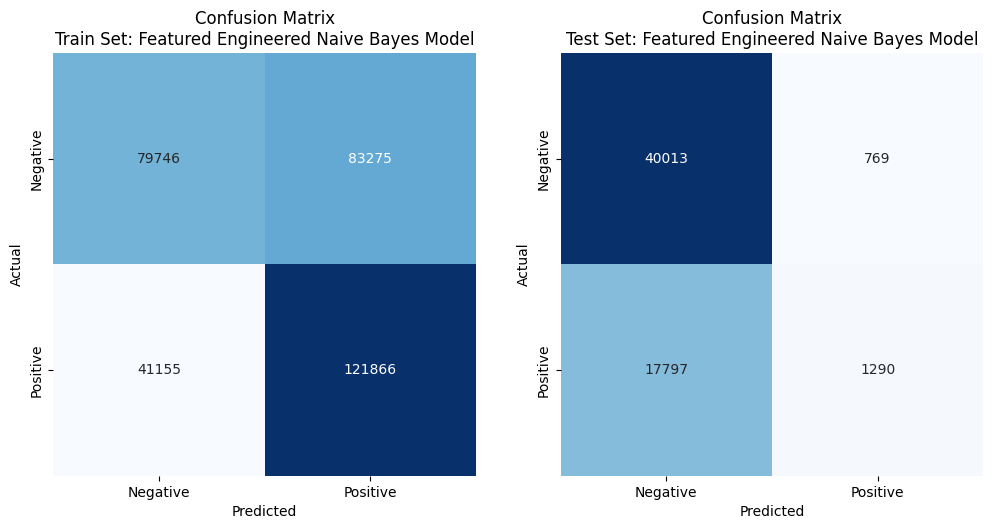

In [ ]:
# Compute confusion matrices
y_train_pred_bfe = logistic_fe.predict(X_train_resampled_normalized)
conf_matrix_train_bfe = confusion_matrix(y_train_resampled, y_train_pred_bfe)
conf_matrix_test_bfe = confusion_matrix(y_test2, y_test_pred_bfe)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# First heatmap for Train Set
sns.heatmap(conf_matrix_train_bfe, annot=True, fmt='d', cmap='Blues', square=True,cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=[ 'Negative','Positive'], ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Confusion Matrix\nTrain Set: Featured Engineered Naive Bayes Model')

# Second heatmap for Test Set
sns.heatmap(conf_matrix_test_bfe, annot=True, fmt='d', cmap='Blues', square=True,cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=[ 'Negative','Positive'], ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title('Confusion Matrix\nTest Set: Featured Engineered Naive Bayes Model');

### KNN

In [ ]:
# Define KNN evaluation function
def evaluate_knn_model(knn_model, X_train, y_train, X_test, y_test):
    knn_model.fit(X_train, y_train)
    y_train_pred = knn_model.predict(X_train)
    y_test_pred = knn_model.predict(X_test)

    # Calculate metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    y_test_prob = knn_model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_test_prob)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred)

    return {
        "train_acc": train_acc,
        "test_acc": test_acc,
        "auc": auc_score,
        "precision": precision[1],
        "recall": recall[1],
        "f1": f1[1],
        "conf_matrix_train": confusion_matrix(y_train, y_train_pred),
        "conf_matrix_test": confusion_matrix(y_test, y_test_pred),
    }

In [ ]:
# Step 1: Cross-Validation for Finding Optimal k (Using Train-Test Split Instead)
k_values = list(range(1, 6))  # Set k-values you want to test
cv_scores = []
start_time = time.time()

print("Starting cross-validation for K values...")
for idx, k in enumerate(k_values, start=1):
    print(f"Processing k={k} ({idx}/{len(k_values)})...")
    iter_start_time = time.time()

    # Train-test split for a single validation
    X_train, X_val, y_train, y_val = train_test_split(X_train_resampled_normalized, y_train_resampled, test_size=0.3, random_state=42)

    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_val_pred = knn_model.predict(X_val)

    # Calculate accuracy for validation set
    score = accuracy_score(y_val, y_val_pred)
    cv_scores.append(score)

    iter_end_time = time.time()
    elapsed = iter_end_time - iter_start_time
    print(f"Completed k={k} in {elapsed:.2f} seconds.")

end_time = time.time()
cv_duration = end_time - start_time
print(f"\nCross-Validation Duration: {cv_duration:.2f} Seconds")

Starting cross-validation for K values...
Processing k=1 (1/5)...
Completed k=1 in 158.24 seconds.
Processing k=2 (2/5)...
Completed k=2 in 157.96 seconds.
Processing k=3 (3/5)...
Completed k=3 in 159.50 seconds.
Processing k=4 (4/5)...
Completed k=4 in 159.67 seconds.
Processing k=5 (5/5)...
Completed k=5 in 158.06 seconds.

Cross-Validation Duration: 793.43 Seconds


Optimal K: 1


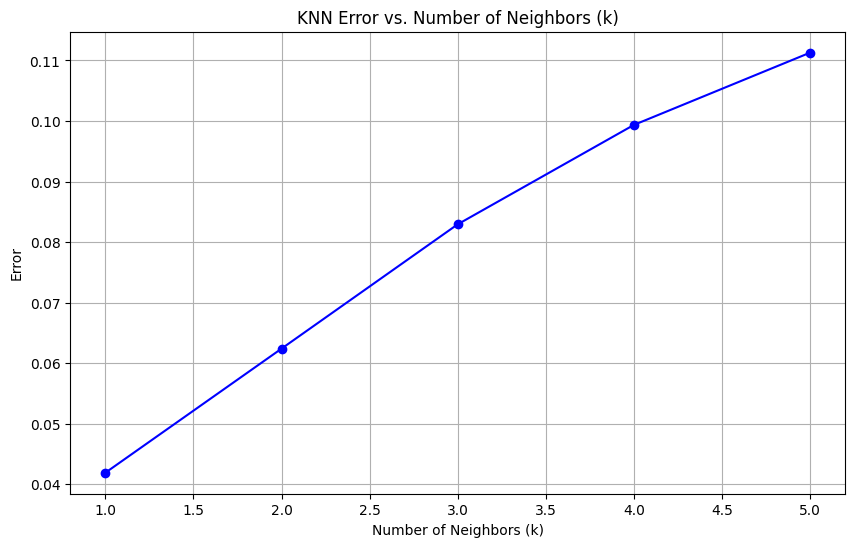

In [ ]:
# Calculate errors and find optimal k
errors = [1 - score for score in cv_scores]
optimal_k = k_values[np.argmin(errors)]
print(f"Optimal K: {optimal_k}")

# Plot Error vs K
plt.figure(figsize=(10, 6))
plt.plot(k_values, errors, marker='o', color='blue')
plt.title('KNN Error vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error')
plt.grid(True)
plt.show()

In [ ]:
# Step 2: Train Final Model with Optimal k
knn_model_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
start_time = time.time()
metrics = evaluate_knn_model(knn_model_optimal, X_train_resampled_normalized, y_train_resampled, X_test2_normalized, y_test2)
end_time = time.time()

training_duration = cv_duration + (end_time - start_time)
print(f"Total Training Duration: {training_duration:.2f} Seconds")

# Print Metrics
print(f"Train Accuracy: {metrics['train_acc']:.2%}")
print(f"Test Accuracy: {metrics['test_acc']:.2%}")
print(f"AUC Score: {metrics['auc']:.2%}")
print(f"Precision: {metrics['precision']:.2%}")
print(f"Recall: {metrics['recall']:.2%}")
print(f"F1-Score: {metrics['f1']:.2%}")

Total Training Duration: 1824.71 Seconds
Train Accuracy: 99.55%
Test Accuracy: 94.97%
AUC Score: 94.23%
Precision: 92.06%
Recall: 92.17%
F1-Score: 92.12%


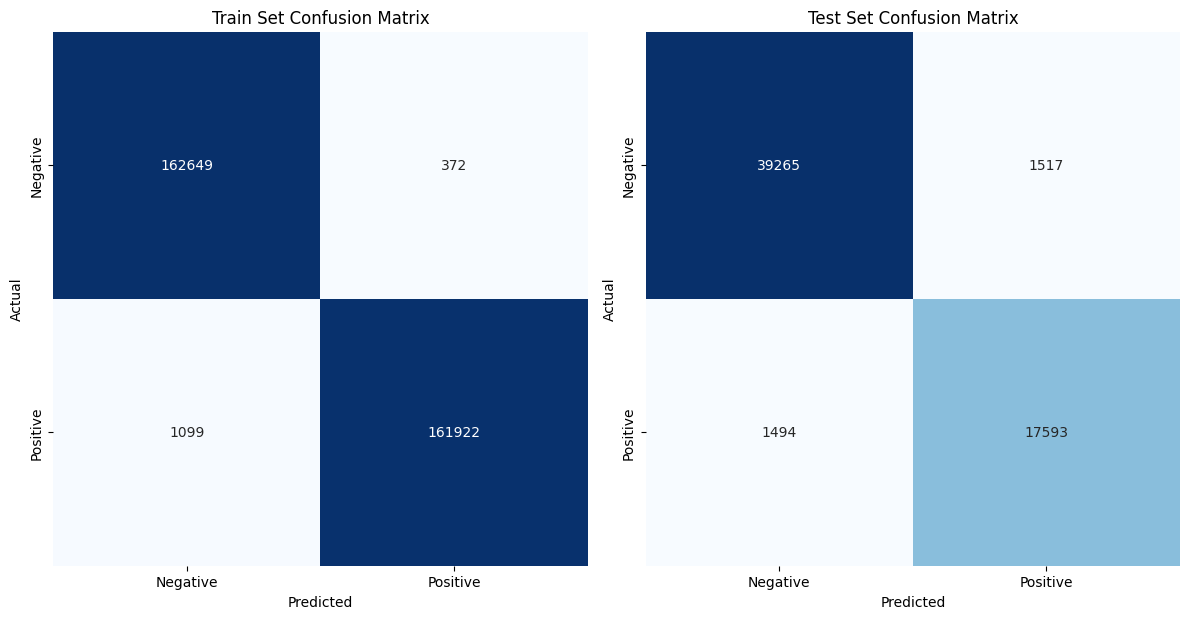

In [ ]:
# Plot Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(metrics['conf_matrix_train'], annot=True, fmt='d', cmap='Blues', square=True, cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=axes[0])
axes[0].set_title('Train Set Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(metrics['conf_matrix_test'], annot=True, fmt='d', cmap='Blues', square=True, cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=axes[1])
axes[1].set_title('Test Set Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

### Random Forest

In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Predict on train and test datasets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Compute accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    # Compute probabilities and AUC
    y_test_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_test_prob)
    auc_score = roc_auc_score(y_test, y_test_prob)

    # Precision, Recall, F1 Score
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred)

    # Confusion matrix
    conf_matrix_train = confusion_matrix(y_train, y_train_pred)
    conf_matrix_test = confusion_matrix(y_test, y_test_pred)

    return train_acc, test_acc, auc_score, precision[1], recall[1], f1[1], conf_matrix_train, conf_matrix_test

In [ ]:
# Best model from hyperparameter tuning
bestParam = {
    'n_estimators': 317,
    'max_features': 'sqrt',
    'min_samples_split': 10,
    'min_samples_leaf': 6
}
rf_fe = RandomForestClassifier(criterion='entropy', random_state=42, **bestParam)
rf_fe.fit(X_train_resampled_normalized, y_train_resampled)

# Evaluate the model
train_acc_rffe, test_acc_rffe, auc_score_rffe, precision_rffe, recall_rffe, f1_rffe, conf_matrix_train_rffe, conf_matrix_test_rffe = evaluate_model(
    rf_fe, X_train_resampled_normalized, y_train_resampled, X_test2_normalized, y_test2)

# Display results
print(f"Training Accuracy: {train_acc_rffe:.2%}")
print(f"Test Accuracy: {test_acc_rffe:.2%}")
print(f"AUC Score: {auc_score_rffe:.2%}")
print(f"Precision: {precision_rffe:.2%}")
print(f"Recall: {recall_rffe:.2%}")
print(f"F1-Score: {f1_rffe:.2%}")

Training Accuracy: 96.91%
Test Accuracy: 91.95%
AUC Score: 97.39%
Precision: 85.76%
Recall: 89.64%
F1-Score: 87.66%


In [ ]:
# Feature Importance
feature_importances = pd.Series(rf_fe.feature_importances_, index=X_train_resampled_normalized.columns)
print("Feature Importance:")
print(feature_importances.sort_values(ascending=False))

Feature Importance:
lexical_richness      0.184835
Readability_index     0.176597
Avg_sent_word_cnt     0.159143
word_cnt              0.150124
vocab_cnt             0.150080
sent_cnt              0.076401
management            0.029993
Cust_Service          0.028294
project_management    0.015354
per_hour              0.012650
experience_working    0.010733
cross_functional      0.005400
minimum_years         0.000366
diploma_ged           0.000030
diploma_equiv         0.000000
track_record          0.000000
dtype: float64


Text(0.5, 1.0, 'Confusion Matrix\nTest Set: Featured Engineered Random Forest Model')

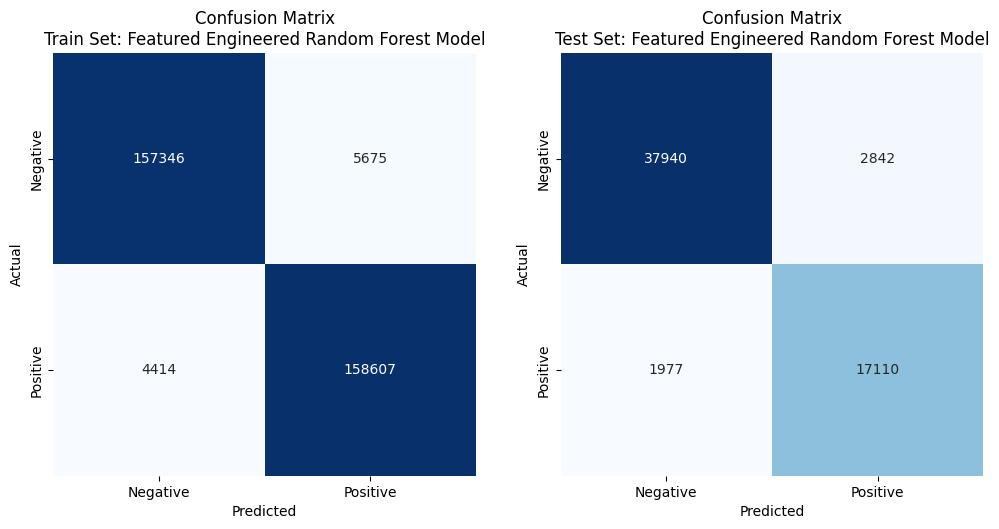

In [ ]:
# Confusion matrix heatmaps
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First heatmap for Train Set
sns.heatmap(conf_matrix_train_rffe, annot=True, fmt='d', cmap='Blues', square=True, cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Confusion Matrix\nTrain Set: Featured Engineered Random Forest Model')

# Second heatmap for Test Set
sns.heatmap(conf_matrix_test_rffe, annot=True, fmt='d', cmap='Blues', square=True, cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title('Confusion Matrix\nTest Set: Featured Engineered Random Forest Model')

### Gradient Boosting

In [ ]:
def objective(trial):
    param_dist = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20)
    }

    gbm = GradientBoostingClassifier(random_state=42, **param_dist)
    cv_scores = cross_val_score(gbm, X_train_resampled_normalized, y_train_resampled, cv=10)

    return cv_scores.mean()

In [ ]:
# Best model parameters from hyperparameter tuning
GBBestParam = {
    'n_estimators': 469,
    'learning_rate': 0.1031,
    'max_depth': 10,
    'subsample': 0.7769,
    'min_samples_split': 18,
    'min_samples_leaf': 5
}

In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    """Evaluate model and compute metrics."""
    # Training accuracy
    y_train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)

    # Test accuracy
    y_test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)

    # ROC AUC
    y_test_prob = model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_test_prob)

    # Precision, Recall, F1-Score
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_test_pred)

    return {
        'train_acc': train_acc,
        'test_acc': test_acc,
        'auc_score': auc_score,
        'precision': precision[1],
        'recall': recall[1],
        'f1_score': f1[1],
        'conf_matrix_train': confusion_matrix(y_train, y_train_pred),
        'conf_matrix_test': confusion_matrix(y_test, y_test_pred)
    }

In [ ]:
def plot_confusion_matrices(conf_matrix_train, conf_matrix_test):
    """Plot confusion matrices for train and test sets."""
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Train set confusion matrix
    sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', square=True, cbar=False,
                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=axes[0])
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('Actual')
    axes[0].set_title('Confusion Matrix\nTrain Set')

    # Test set confusion matrix
    sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', square=True, cbar=False,
                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=axes[1])
    axes[1].set_xlabel('Predicted')
    axes[1].set_ylabel('Actual')
    axes[1].set_title('Confusion Matrix\nTest Set')

    plt.show()

In [ ]:
# Train model with best parameters
gbm_fe = GradientBoostingClassifier(random_state=42, **GBBestParam)
gbm_fe.fit(X_train_resampled_normalized, y_train_resampled)

# Evaluate the model
metrics = evaluate_model(gbm_fe, X_train_resampled_normalized, y_train_resampled, X_test2_normalized, y_test2)

# Print metrics
print(f"Train Accuracy: {metrics['train_acc']:.2%}")
print(f"Test Accuracy: {metrics['test_acc']:.2%}")
print(f"AUC Score: {metrics['auc_score']:.2%}")
print(f"Precision: {metrics['precision']:.2%}")
print(f"Recall: {metrics['recall']:.2%}")
print(f"F1-Score: {metrics['f1_score']:.2%}")

Train Accuracy: 96.27%
Test Accuracy: 91.55%
AUC Score: 96.76%
Precision: 84.89%
Recall: 89.43%
F1-Score: 87.10%


Feature Importance:
lexical_richness      0.216849
Readability_index     0.200131
Avg_sent_word_cnt     0.139221
vocab_cnt             0.129195
word_cnt              0.116882
sent_cnt              0.062930
management            0.045831
Cust_Service          0.042684
project_management    0.015906
per_hour              0.013817
experience_working    0.011279
cross_functional      0.004863
minimum_years         0.000340
diploma_ged           0.000071
diploma_equiv         0.000000
track_record          0.000000
dtype: float64


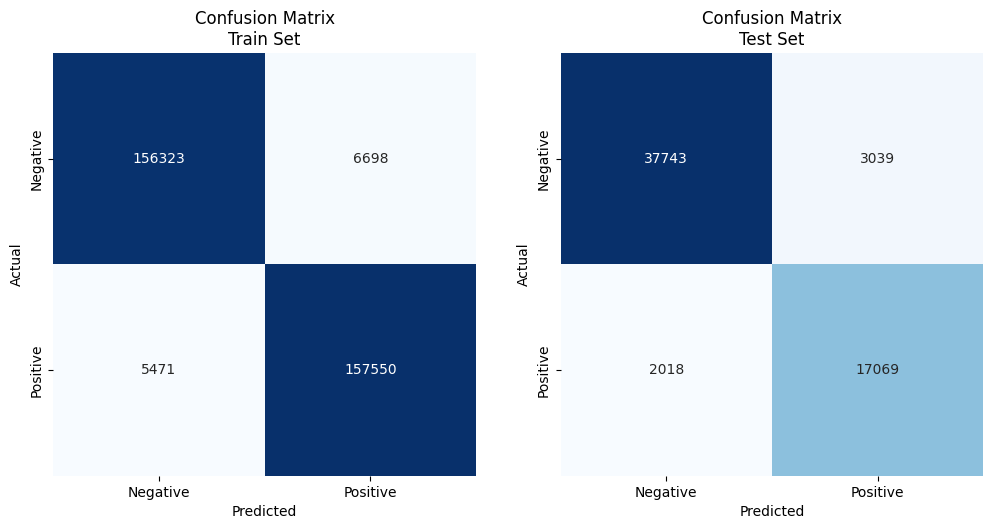

In [ ]:
# Feature Importance
feature_importances = pd.Series(gbm_fe.feature_importances_, index=X_train_resampled_normalized.columns)
print("Feature Importance:")
print(feature_importances.sort_values(ascending=False))

# Plot confusion matrices
plot_confusion_matrices(metrics['conf_matrix_train'], metrics['conf_matrix_test'])

## Part 4: Recomendation Of Jobs

### Neural Network Model for Recommendation


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics.pairwise import cosine_similarity
import shap
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import pandas as pd
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Preparing the DataFrame

df_postings = df_postings.drop_duplicates(subset=['company_name', 'title', 'description'], keep='first')

df_postings = df_postings[
    df_postings['company_name'].notnull() & df_postings['company_name'].str.strip().astype(bool) &
    df_postings['title'].notnull() & df_postings['title'].str.strip().astype(bool) &
    df_postings['description'].notnull() & df_postings['description'].str.strip().astype(bool)
]

In [ ]:
# Processing Text and Embeddings

df_postings['text'] = df_postings['title'] + ' ' + df_postings['description']

def preprocess_text(text):
    text = text.lower().split()
    return text

df_postings['processed_text'] = df_postings['text'].apply(preprocess_text)

tagged_data = [TaggedDocument(words=row, tags=[idx]) for idx, row in enumerate(df_postings['processed_text'])]

doc2vec_model = Doc2Vec(tagged_data, vector_size=100, window=5, min_count=2, epochs=10)

df_postings['text_embedding'] = df_postings['processed_text'].apply(lambda x: doc2vec_model.infer_vector(x))

job_embeddings = np.stack(df_postings['text_embedding'].values)
job_embeddings = torch.tensor(job_embeddings, dtype=torch.float32)

In [ ]:
class JobRecommendationNN(nn.Module):
    def __init__(self, input_dim):
        super(JobRecommendationNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 1)  # Output is a single relevance score

    def forward(self, user_input, job_input):
        # Concatenate user and job embeddings
        combined_input = torch.cat((user_input, job_input), dim=1)
        x = self.fc1(combined_input)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu2(x)
        relevance_score = torch.sigmoid(self.fc3(x))
        return relevance_score


In [ ]:
def create_training_data(df_postings, num_neg_samples=5):
    training_data = []
    for idx, row in df_postings.iterrows():
        positive_sample = (row['processed_text'], row['text_embedding'], 1)  # Positive match
        training_data.append(positive_sample)

        # Generate negative samples
        for _ in range(num_neg_samples):
            neg_idx = np.random.randint(0, len(df_postings))
            while neg_idx == idx:
                neg_idx = np.random.randint(0, len(df_postings))
            negative_sample = (row['processed_text'], df_postings.iloc[neg_idx]['text_embedding'], 0)
            training_data.append(negative_sample)

    return training_data


In [ ]:
training_data = create_training_data(df_postings)
embedding_dim = doc2vec_model.vector_size
model = JobRecommendationNN(embedding_dim * 2)  # Input dimension is twice the embedding size

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Prepare DataLoader
class JobDataset(torch.utils.data.Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        user_text, job_embedding, label = self.data[idx]
        user_embedding = doc2vec_model.infer_vector(user_text)
        return torch.tensor(user_embedding, dtype=torch.float32), \
               torch.tensor(job_embedding, dtype=torch.float32), \
               torch.tensor(label, dtype=torch.float32)

train_loader = torch.utils.data.DataLoader(JobDataset(training_data), batch_size=32, shuffle=True)

# Training loop
for epoch in range(10):
    for user_input, job_input, label in train_loader:
        optimizer.zero_grad()
        output = model(user_input, job_input)
        loss = criterion(output.squeeze(), label)
        loss.backward()
        optimizer.step()

In [ ]:
def recommend_jobs_nn(user_input, model, df_postings, num_recommendations=5):
    user_embedding = doc2vec_model.infer_vector(preprocess_text(user_input))
    user_embedding = torch.tensor(user_embedding, dtype=torch.float32).unsqueeze(0)

    scores = []
    for idx, row in df_postings.iterrows():
        job_embedding = torch.tensor(row['text_embedding'], dtype=torch.float32).unsqueeze(0)
        score = model(user_embedding, job_embedding).item()
        scores.append((score, row['title'], row['description']))

    # Sort by score and return top recommendations
    scores = sorted(scores, key=lambda x: x[0], reverse=True)[:num_recommendations]
    recommendations = pd.DataFrame(scores, columns=['Score', 'Title', 'Description'])
    return recommendations

In [ ]:
user_query = "Technician for Lab or Animal Rescuer"
recommendations = recommend_jobs(user_query, model, job_embeddings, num_recommendations=5)
print("Job Recommendations:")
print(recommendations)

[[-0.05372544  0.18007773  0.17761889 ... -0.16349046 -0.1596151
   0.02280633]]
Job Recommendations:
                                                    title  \
213343      Volunteer: Wild Paws General Onsite Volunteer   
213344      Volunteer: Wild Paws General Onsite Volunteer   
249731  Senior Technician - Electrical and PLC Program...   
148089                                     Lab Technician   
249729  Senior Technician - Electrical and PLC Program...   

                                              description  
213343  Wild Paws seeks to rescue native wild animals ...  
213344  Wild Paws seeks to rescue native wild animals ...  
249731  Job Summary\n\nPrograms automation and control...  
148089  Summary: As the Laboratory Technician, you wil...  
249729  Job Summary\n\nPrograms automation and control...  
